# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from statsmodels.stats.weightstats import _zconfint_generic
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [10]:
maxwell_rv = sts.maxwell()
sample = maxwell_rv.rvs(size=100)
sample

array([1.47415037, 1.66907683, 2.37188792, 3.12953134, 1.19598943,
       1.74576516, 2.56485468, 1.78695609, 2.9824953 , 1.86706803,
       0.84231768, 2.02854586, 1.4233749 , 0.38510022, 2.36421759,
       1.28158632, 2.02918928, 1.59310284, 1.50624402, 1.79320403,
       2.11625034, 3.89339996, 2.23798673, 1.52927431, 0.82523673,
       1.7216339 , 1.75176818, 1.87714953, 0.42303316, 1.29605075,
       2.19672182, 1.162668  , 1.37803756, 1.1261845 , 0.79077661,
       0.64413128, 1.46688339, 1.06612786, 1.35368034, 2.53844757,
       1.91843712, 0.66916676, 2.5071055 , 1.10930984, 2.74931746,
       1.44563614, 1.89056519, 2.02363656, 1.56042485, 1.33106727,
       1.63740595, 1.42726542, 1.42903436, 2.23604213, 0.33853905,
       2.90558279, 1.51767853, 0.66764424, 1.43688937, 1.5989197 ,
       1.47473872, 1.6666494 , 1.63757808, 1.85406192, 1.84611354,
       1.65357326, 1.9889376 , 1.05968294, 1.21851866, 0.53215394,
       2.11446037, 1.1383123 , 0.82512512, 1.41405931, 1.29204

In [12]:
maxwell_rv.mean()

1.5957691216057308

In [13]:
maxwell_rv.var()

0.45352091052967447

### Постройте гистограмму выборки и теоретическую плотность распределения

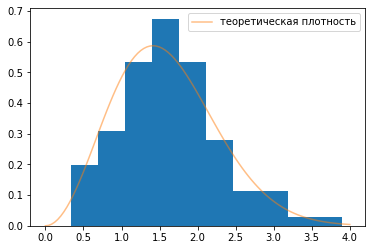

In [14]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(0,4,100)
pdf = maxwell_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [15]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.6221191508622286
0.44890280991697445


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [18]:
# сгенерируем выборочные средние для выборок разного объёма
means = []
for i in range(500, 50001, 500):
    means.append(np.mean(maxwell_rv.rvs(i)))
# определим средний размер выборки
N = sum(range(500, 50001, 500)) / len(means)

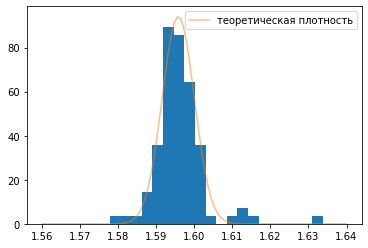

In [19]:
norm_rv = sts.norm(loc=maxwell_rv.mean(), scale=maxwell_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=20)
x = np.linspace(1.56,1.64,num=100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
# Хорошо, есть выбросы, но большая часть под графиком распределения

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [21]:
df = pd.read_csv('telecom_churn.csv', sep=',')

In [22]:
# Выборка 1 - клиенты, которые не ушли
sample_1 = df[df['churn'] == False]['total day calls']
sample_1 = sample_1.reset_index(drop=True)

# Выборка 2 - клиенты, которые ушли
sample_2 = df[df['churn'] == True]['total day calls']
sample_2 = sample_2.reset_index(drop=True)

# оценка ДИ среднего значения с использованием явной формулы для z интервала

In [23]:
# матожидание по генеральной совокупности
mu = df['total day calls'].mean()
# дисперсия по генеральной совокупности
sigma = df['total day calls'].std()
# z-критерии для для разных уровней знчимости:
z_crit = {'95%': 1.96, '90%': 1.64, '75%': 1.15}

N = {'Sample-1': sample_1, 'Sample-2': sample_2}

for key in N:
    print(f'Доверительные интервалы по {key}:')
    for alpha in z_crit:
        lower = round(N[key].mean() - z_crit[alpha] * (sigma / np.sqrt(len(N[key]))), 2)
        upper = round(N[key].mean() + z_crit[alpha] * (sigma / np.sqrt(len(N[key]))), 2)
        print(f'{alpha}: {lower} - {upper}')

Доверительные интервалы по Sample-1:
95%: 99.55 - 101.02
90%: 99.67 - 100.9
75%: 99.85 - 100.72
Доверительные интервалы по Sample-2:
95%: 99.55 - 103.13
90%: 99.84 - 102.83
75%: 100.29 - 102.39


# оценка ДИ значения признака с использованием _zconfint_generic

In [24]:
f'Доверительные интервалы по Sample-1:',\
_zconfint_generic(sample_1.mean(), sample_1.std() / np.sqrt(len(sample_1)), 0.05, alternative='two-sided'),\
_zconfint_generic(sample_1.mean(), sample_1.std() / np.sqrt(len(sample_1)), 0.1, alternative='two-sided'),\
_zconfint_generic(sample_1.mean(), sample_1.std() / np.sqrt(len(sample_1)), 0.25, alternative='two-sided'),\
f'Доверительные интервалы по Sample-2:',\
_zconfint_generic(sample_2.mean(), sample_2.std() / np.sqrt(len(sample_2)), 0.05, alternative='two-sided'),\
_zconfint_generic(sample_2.mean(), sample_2.std() / np.sqrt(len(sample_2)), 0.1, alternative='two-sided'),\
_zconfint_generic(sample_2.mean(), sample_2.std() / np.sqrt(len(sample_2)), 0.25, alternative='two-sided')

('Доверительные интервалы по Sample-1:',
 (99.55618833318324, 101.01012745629045),
 (99.6730658065981, 100.89324998287559),
 (99.85648220514163, 100.70983358433206),
 'Доверительные интервалы по Sample-2:',
 (99.41066229112079, 103.26014516229537),
 (99.7201097946553, 102.95069765876086),
 (100.20572729628557, 102.46508015713059))

In [27]:
# norm_rv = sts.norm(sample_1.mean(), sample_1.std())
# x = np.linspace(40, 160, len(sample_1))
# pdf = norm_rv.pdf(x)
# plt.plot(x, pdf)
# alpha = 0.05
# q_a = norm_rv.ppf(alpha/2)
# q_b = norm_rv.ppf(1-alpha/2)
# to_fill = np.linspace(q_a, q_b, 100)
# plt.fill_between(to_fill, norm_rv.pdf(to_fill), color='green')
# plt.show()

In [26]:
# вариант через создание серии выборок, определения средних значений по ним и стандартного отклонения по выборке средних

x = df['total day calls']
n_iterations = 5000
n_size = int(len(df)*0.1)
means = list()
for i in range (n_iterations):
    s = np.random.choice(x, size=n_size, replace=False)
    m = np.mean(s);
    means.append(m)

print(f'Доверительные интервалы по Sample-1:', '\n',\
      _zconfint_generic(sample_1.mean(), np.std(means), 0.05, alternative='two-sided'), '\n',\
      _zconfint_generic(sample_1.mean(), np.std(means), 0.1, alternative='two-sided'), '\n',\
      _zconfint_generic(sample_1.mean(), np.std(means), 0.25, alternative='two-sided'), '\n',\
      f'Доверительные интервалы по Sample-2:', '\n',\
      _zconfint_generic(sample_2.mean(), np.std(means), 0.05, alternative='two-sided'), '\n',\
      _zconfint_generic(sample_2.mean(), np.std(means), 0.1, alternative='two-sided'), '\n',\
      _zconfint_generic(sample_2.mean(), np.std(means), 0.25, alternative='two-sided'))   

Доверительные интервалы по Sample-1: 
 (98.25944840228122, 102.30686738719247) 
 (98.58480735114617, 101.98150843832752) 
 (99.09539476282721, 101.47092102664648) 
 Доверительные интервалы по Sample-2: 
 (99.31169423425246, 103.3591132191637) 
 (99.6370531831174, 103.03375427029876) 
 (100.14764059479845, 102.52316685861771)
